## Решение тестового задания и анализ данных retailcrm Riche

# Цель проекта:

**Демонстрация способностей соискателя и решение тестового задания на основе аналитических данных из базы retailcrm**

**Описание:**

В нашем распоряжении задние от Riche для соискателя на вакансию Python разработчик (Аналитик BI):

Задание для разработчиков
@sangisoNovember 15, 2023
Это задание для разработчиков разделено на две части.

1️⃣ Основная цель – извлечение данных с сайта Retail CRM, их очистка, и отправка через наше API в базу данных.

✏️ Необходимо использовать метод для получения данных: ссылка

✏️ Метод для записи данных: /site/add_site_data/ ссылка

✏️ Метод для записи данных: /site/add_site_items/ ссылка

✏️ API-документация: ссылка

2️⃣ Вторая часть задания связана с пагинацией метода “orders” (RetailCRM). Требуется загрузить большой объем данных за определенный период и записать их в базу данных. Под этим подразумевается следующее: допустим, на RetailCRM есть 100 заказов, но они выдают только 10 заказов за один запрос. Поэтому придется сделать несколько запросов: 10, 10, 10 и так далее.

 Успешным выполнением запроса считается получение ответа от нашего API:

{
"status": true, 
"message": "Создано - 7 повторения - 0 за 00:00:00.007" 
} 
Весь получившийся код нужно будет передать через удаленный репозиторий (GitHub, GitLab), на ваш выбор.

Данные для RCRM:

api_key = FjqFa87rUgdvxFhrhyPQQiy41kl5AnXq-1

site = app-riche-skin

api_url = https://b7w2x7a.retailcrm.ru/api/v5/orders



👉 По всем вопросам можете писать мне в TG 📲 https://t.me/sangiso 

# Решение:

In [1]:
# импортируем необходимые библиотеки
import requests
import json

In [2]:
# зададим в переменных адрес URL и ключ для запроса из API
URL_GET = 'https://b7w2x7a.retailcrm.ru/api/v5/orders'
headers = {"X-API-KEY": "FjqFa87rUgdvxFhrhyPQQiy41kl5AnXq-1"}

In [3]:
# создадим get запрос из базы retailcrm
res = requests.get(url=URL_GET, headers=headers)
data = res.json()
# выведем ответ в формате json
#data

Получили первую страницу ответа из retailcrm. В заднии требуется: "Успешным выполнением запроса считается получение ответа от нашего API". Попробуем запросить доступ к API получателя, данного в задании:

# попробуем get запрос к сайту в задании (post ззапрос не будет успешен без успешного get)
URL_GET = 'https://app-riche-skin'
res = requests.get(url=URL_GET)
res

Встречаем ошибку  HTTPSConnectionPool(host='app-riche-skin', port=443). Попробуем доступ к основному сайту компании:

In [4]:
URL_GET = 'https://riche.skin'

In [5]:
res = requests.get(url=URL_GET)
res

<Response [200]>

In [6]:
#res.text

Получем доступ по get запросу к основму сайту. Здесь возможен вопрос в рамках задания: "👉 По всем вопросам можете писать мне в TG 📲 https://t.me/sangiso"

Вариант решения задания (с учетом пагинации):

через перебор чиклом перебирем страницы в параметрах get запроса
сохраняем в json post заапрос на сайт внутренней CRM
for p in range(1, 8):  
-    response = requests.get(url=URL_GET, headers=headers, params={"page" : p})  
-    data = response.json()  
-    r = requests.post('https://app-riche-skin/add_site_data', data = data)  

Вопросы для выполения тестового задания:

* в чем ошибка доступа в GET к app-riche-skin? без него невозможны POST методы описанные в документации  
* какова структура body должна быть в post запросе?

# Анализ:

Попробуем проанализировать то, к чему имеем доступ:

In [7]:
# импортируем библитеку pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

In [8]:
# зададим в переменных адрес URL и ключ для запроса из API
URL_GET = 'https://b7w2x7a.retailcrm.ru/api/v5/orders'
headers = {"X-API-KEY": "FjqFa87rUgdvxFhrhyPQQiy41kl5AnXq-1"}

In [9]:
# создадим get запрос из базы retailcrm
res = requests.get(url=URL_GET, headers=headers)
data = res.json()
# оставим из списка только вложенный список orders в переменной df
df = pd.DataFrame(data["orders"])

In [10]:
df.head(5)

,slug,bonusesCreditTotal,bonusesChargeTotal,id,number,orderType,privilegeType,countryIso,createdAt,statusUpdatedAt,...,currency,externalId,orderMethod,lastName,managerId,statusComment,additionalPhone,fullPaidAt,shipmentDate,customerComment
0,1068925,0,0,1068925,1068925C,eshop-individual,none,RU,2023-11-23 14:54:43,2023-11-23 14:54:43,...,RUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1068924,0,0,1068924,1068924C,eshop-individual,none,RU,2023-11-23 14:50:53,2023-11-23 14:50:53,...,RUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1068923,0,0,1068923,1068923C,eshop-individual,none,RU,2023-11-23 14:43:03,2023-11-23 14:43:03,...,RUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1068921,0,0,1068921,1068921C,eshop-individual,none,RU,2023-11-23 14:22:00,2023-11-23 14:22:00,...,RUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1068913,0,0,1068913,1068913C,eshop-individual,none,RU,2023-11-23 11:36:50,2023-11-23 11:36:50,...,RUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# информация по базе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   slug                20 non-null     int64  
 1   bonusesCreditTotal  20 non-null     int64  
 2   bonusesChargeTotal  20 non-null     int64  
 3   id                  20 non-null     int64  
 4   number              20 non-null     object 
 5   orderType           20 non-null     object 
 6   privilegeType       20 non-null     object 
 7   countryIso          20 non-null     object 
 8   createdAt           20 non-null     object 
 9   statusUpdatedAt     20 non-null     object 
 10  summ                20 non-null     int64  
 11  totalSumm           20 non-null     int64  
 12  prepaySum           20 non-null     int64  
 13  purchaseSumm        20 non-null     int64  
 14  markDatetime        20 non-null     object 
 15  firstName           20 non-null     object 
 16  phone     

In [12]:
# Переберем первые 7 страниц бызы retailcrm
for p in range(2, 8):
    # создадим get запрос из базы retailcrm
    res = requests.get(url=URL_GET, headers=headers, params={"page" : p})
    data = res.json()
    # оставим из списка только вложенный список orders
    df_current = pd.DataFrame(data["orders"])
    # объединим в одну базу запрошенные страницы
    df = pd.concat([df, df_current])

In [13]:
df.head(5)

,slug,bonusesCreditTotal,bonusesChargeTotal,id,number,orderType,privilegeType,countryIso,createdAt,statusUpdatedAt,...,orderMethod,lastName,managerId,statusComment,additionalPhone,fullPaidAt,shipmentDate,customerComment,patronymic,managerComment
0,1068925,0,0,1068925,1068925C,eshop-individual,none,RU,2023-11-23 14:54:43,2023-11-23 14:54:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1068924,0,0,1068924,1068924C,eshop-individual,none,RU,2023-11-23 14:50:53,2023-11-23 14:50:53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1068923,0,0,1068923,1068923C,eshop-individual,none,RU,2023-11-23 14:43:03,2023-11-23 14:43:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1068921,0,0,1068921,1068921C,eshop-individual,none,RU,2023-11-23 14:22:00,2023-11-23 14:22:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1068913,0,0,1068913,1068913C,eshop-individual,none,RU,2023-11-23 11:36:50,2023-11-23 11:36:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#df.tail(5)

In [15]:
# создадим фукцию для вывода общей инфрмации по таблице целиком
def tab_info(df_x, name):
# получение первых строк таблицы df
    print('Первые строки таблицы', name)
    try:
        display(df_x.head(10))
    except:
        display(df_x.head(2))
# получение случайных строк таблицы df
    print('Cлучайные строки таблицы', name)
    try:
        display(df_x.sample(10))
    except:
        display(df_x.sample(2))
# получение последних строк таблицы df
    print('Последние строки таблицы', name)
    try:
        display(df_x.tail(10))
    except:
        display(df_x.tail(2))
# получение cводной информации по параметрам данных
    print('Сводная информация по параметрам данных', name)
    display(df_x.describe().round(2))
# подсчет количества отсутствующих значений
    print('Количество отсутствующих значений', name)
    display(df_x.isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x.isna().sum() * 100 / len(df_x), 2))
# подсчет количества задублированных записей
    print('Задублированных записей', name)
    display(df_x.duplicated().sum())    
# получение общей информации о данных в таблице
    print('Общая информация о данных в таблице', name)
    display(df_x.info())

In [16]:
# для анализа оставим несколько столбцов: ID заказа, Тип заказа,
# Дата оформления заказа, Общая сумма с учетом скидки (в валюте объекта)
df_1 = df[['id', 'orderType', 'createdAt', 'totalSumm']]

In [17]:
# вывод общей инфрмации по таблице целиком
tab_info(df_1, 'df последние 7 страниц RetailCRM')

Первые строки таблицы df последние 7 страниц RetailCRM


,id,orderType,createdAt,totalSumm
0,1068925,eshop-individual,2023-11-23 14:54:43,0
1,1068924,eshop-individual,2023-11-23 14:50:53,0
2,1068923,eshop-individual,2023-11-23 14:43:03,0
3,1068921,eshop-individual,2023-11-23 14:22:00,0
4,1068913,eshop-individual,2023-11-23 11:36:50,0
5,1068910,eshop-individual,2023-11-23 11:11:44,0
6,1068907,eshop-individual,2023-11-23 08:57:08,1518
7,1068906,eshop-individual,2023-11-23 05:57:48,870
8,1068905,eshop-individual,2023-11-23 00:09:24,1501
9,1068904,eshop-individual,2023-11-22 23:57:27,1888


Cлучайные строки таблицы df последние 7 страниц RetailCRM


,id,orderType,createdAt,totalSumm
5,1068910,eshop-individual,2023-11-23 11:11:44,0
10,1068803,eshop-individual,2023-11-18 21:40:41,1657
15,1068797,eshop-individual,2023-11-18 11:13:48,1268
1,1068782,eshop-individual,2023-11-17 16:43:37,1768
3,1068721,eshop-individual,2023-11-16 07:47:08,2355
1,1068817,eshop-individual,2023-11-20 10:50:58,783
18,1068883,eshop-individual,2023-11-21 20:42:21,842
11,1068802,eshop-individual,2023-11-18 20:59:26,1029
7,1068564,eshop-individual,2023-11-10 01:00:36,1230
7,1068713,eshop-individual,2023-11-15 16:27:11,0


Последние строки таблицы df последние 7 страниц RetailCRM


,id,orderType,createdAt,totalSumm
10,1068548,eshop-individual,2023-11-09 14:12:46,1011
11,1068533,eshop-individual,2023-11-09 10:34:57,1198
12,1068531,eshop-individual,2023-11-08 22:26:17,2840
13,1068530,eshop-individual,2023-11-08 21:05:32,1569
14,1068529,eshop-individual,2023-11-08 20:20:51,1305
15,1068519,eshop-individual,2023-11-08 16:00:27,1027
16,1068507,eshop-individual,2023-11-08 12:17:30,819
17,1068498,eshop-individual,2023-11-07 22:24:48,4099
18,1068486,eshop-individual,2023-11-07 14:31:10,0
19,1068475,eshop-individual,2023-11-07 10:54:49,1382


Сводная информация по параметрам данных df последние 7 страниц RetailCRM


,id,totalSumm
count,140.00,140.00
mean,1068740.94,1505.43
std,117.09,2291.06
min,1068475.00,0.00
25%,1068646.75,0.00
50%,1068753.50,1198.00
75%,1068837.25,1749.25
max,1068925.00,23879.00


Количество отсутствующих значений df последние 7 страниц RetailCRM


id           0
orderType    0
createdAt    0
totalSumm    0
dtype: int64

Доли отсутствующих значений с округлением df последние 7 страниц RetailCRM


id           0.0
orderType    0.0
createdAt    0.0
totalSumm    0.0
dtype: float64

Задублированных записей df последние 7 страниц RetailCRM


0

Общая информация о данных в таблице df последние 7 страниц RetailCRM
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         140 non-null    int64 
 1   orderType  140 non-null    object
 2   createdAt  140 non-null    object
 3   totalSumm  140 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.5+ KB


None

In [18]:
# создадим фукцию для вывода инфрмации по столбцу таблицы для числовых данных (должно быть не менее 10 строк)
def col_info_num(df_x, name):
# выведем тип данных столбца
    print('Тип данных', name)
    display(df_x[name].dtypes)
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
    print('Уникальные значения и количество их упоминаний в столбце', name)
    display(df_x[name].value_counts())
# посмотрим максимальные значения
    print('Максимальные значения столбца', name)
    display(df_x.nlargest(10, name))
# получение случайных 10 строк
    print('Cлучайные 10 строк')
    display(df_x.sample(10))   
# посмотрим минимальные значения
    print('Минимальные значения столбца', name)
    display(df_x.nsmallest(10, name))
# проверим столбец на отрицательные значения    
    print('Отрицательные значения столбца', name)
    display(df_x.loc[df_x.loc[:,name] < 0][name].count())
# подсчет отсутствующих значений
    print('Отсутствующие значения', name)
    display(df_x[name].isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x[name].isna().sum() * 100 / len(df_x[name]), 2))
# получение cводной информации по параметрам данных
    print('Сводная информация по параметрам данных', name)
    display(round(df_x[name].describe(), 2))
# построим график распределения данных
    print('График распределения данных', name)
    plt.boxplot(x=df_x[name]);

In [19]:
# создадим фукцию для вывода инфрмации по столбцу таблицы для не числовых данных (должно быть не менее 10 строк)
def col_info_not_num(df_x, name):
# выведем тип данных столбца
    print('Тип данных', name)
    display(df_x[name].dtypes)
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
    print('Уникальные значения и количество их упоминаний в столбце', name)
    display(df_x[name].value_counts())
# получение случайных 10 строк
    print('Cлучайные 10 строк')
    display(df_x.sample(10))
# подсчет отсутствующих значений
    print('Отсутствующие значения', name)
    display(df_x[name].isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x[name].isna().sum() * 100 / len(df_x[name]), 2))

Тип данных id


dtype('int64')

Уникальные значения и количество их упоминаний в столбце id


1068925    1
1068681    1
1068699    1
1068693    1
1068685    1
          ..
1068820    1
1068825    1
1068830    1
1068832    1
1068475    1
Name: id, Length: 140, dtype: int64

Максимальные значения столбца id


,id,orderType,createdAt,totalSumm
0,1068925,eshop-individual,2023-11-23 14:54:43,0
1,1068924,eshop-individual,2023-11-23 14:50:53,0
2,1068923,eshop-individual,2023-11-23 14:43:03,0
3,1068921,eshop-individual,2023-11-23 14:22:00,0
4,1068913,eshop-individual,2023-11-23 11:36:50,0
5,1068910,eshop-individual,2023-11-23 11:11:44,0
6,1068907,eshop-individual,2023-11-23 08:57:08,1518
7,1068906,eshop-individual,2023-11-23 05:57:48,870
8,1068905,eshop-individual,2023-11-23 00:09:24,1501
9,1068904,eshop-individual,2023-11-22 23:57:27,1888


Cлучайные 10 строк


,id,orderType,createdAt,totalSumm
1,1068599,eshop-individual,2023-11-11 17:10:12,569
0,1068783,eshop-individual,2023-11-17 16:45:15,0
1,1068924,eshop-individual,2023-11-23 14:50:53,0
3,1068769,eshop-individual,2023-11-17 12:44:47,0
3,1068862,eshop-individual,2023-11-21 13:06:07,470
19,1068787,eshop-individual,2023-11-17 23:03:08,1663
14,1068889,eshop-individual,2023-11-22 11:27:19,1382
15,1068608,eshop-individual,2023-11-12 18:36:10,2258
10,1068624,eshop-individual,2023-11-13 12:35:43,3594
18,1068883,eshop-individual,2023-11-21 20:42:21,842


Минимальные значения столбца id


,id,orderType,createdAt,totalSumm
19,1068475,eshop-individual,2023-11-07 10:54:49,1382
18,1068486,eshop-individual,2023-11-07 14:31:10,0
17,1068498,eshop-individual,2023-11-07 22:24:48,4099
16,1068507,eshop-individual,2023-11-08 12:17:30,819
15,1068519,eshop-individual,2023-11-08 16:00:27,1027
14,1068529,eshop-individual,2023-11-08 20:20:51,1305
13,1068530,eshop-individual,2023-11-08 21:05:32,1569
12,1068531,eshop-individual,2023-11-08 22:26:17,2840
11,1068533,eshop-individual,2023-11-09 10:34:57,1198
10,1068548,eshop-individual,2023-11-09 14:12:46,1011


Отрицательные значения столбца id


0

Отсутствующие значения id


0

Доли отсутствующих значений с округлением id


0.0

Сводная информация по параметрам данных id


count        140.00
mean     1068740.94
std          117.09
min      1068475.00
25%      1068646.75
50%      1068753.50
75%      1068837.25
max      1068925.00
Name: id, dtype: float64

График распределения данных id


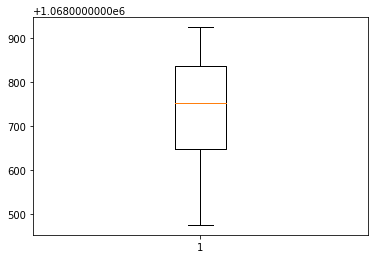

In [20]:
col_info_num (df_1, 'id')

In [21]:
# вывод инфрмации по столбцу таблицы
col_info_not_num (df_1, 'orderType')

Тип данных orderType


dtype('O')

Уникальные значения и количество их упоминаний в столбце orderType


eshop-individual    140
Name: orderType, dtype: int64

Cлучайные 10 строк


,id,orderType,createdAt,totalSumm
6,1068853,eshop-individual,2023-11-21 09:34:25,0
12,1068845,eshop-individual,2023-11-20 17:51:46,5083
15,1068740,eshop-individual,2023-11-16 13:44:04,2885
1,1068726,eshop-individual,2023-11-16 09:33:03,0
4,1068647,eshop-individual,2023-11-14 07:36:10,735
5,1068594,eshop-individual,2023-11-11 08:22:02,461
18,1068486,eshop-individual,2023-11-07 14:31:10,0
4,1068765,eshop-individual,2023-11-17 10:58:55,0
0,1068729,eshop-individual,2023-11-16 09:45:47,0
15,1068797,eshop-individual,2023-11-18 11:13:48,1268


Отсутствующие значения orderType


0

Доли отсутствующих значений с округлением orderType


0.0

Все заказ только в одном типе - eshop-individual    140

In [22]:
# вывод инфрмации по столбцу таблицы
col_info_not_num (df_1, 'createdAt')

Тип данных createdAt


dtype('O')

Уникальные значения и количество их упоминаний в столбце createdAt


2023-11-23 14:54:43    1
2023-11-14 19:57:55    1
2023-11-15 13:43:42    1
2023-11-15 11:57:11    1
2023-11-15 02:44:41    1
                      ..
2023-11-20 11:02:25    1
2023-11-20 12:24:39    1
2023-11-20 13:59:58    1
2023-11-20 14:35:50    1
2023-11-07 10:54:49    1
Name: createdAt, Length: 140, dtype: int64

Cлучайные 10 строк


,id,orderType,createdAt,totalSumm
10,1068699,eshop-individual,2023-11-15 13:43:42,505
10,1068803,eshop-individual,2023-11-18 21:40:41,1657
6,1068809,eshop-individual,2023-11-20 00:00:55,2313
8,1068905,eshop-individual,2023-11-23 00:09:24,1501
7,1068633,eshop-individual,2023-11-13 15:11:16,2064
2,1068815,eshop-individual,2023-11-20 09:49:03,1459
18,1068486,eshop-individual,2023-11-07 14:31:10,0
14,1068889,eshop-individual,2023-11-22 11:27:19,1382
17,1068603,eshop-individual,2023-11-12 03:07:37,1920
3,1068862,eshop-individual,2023-11-21 13:06:07,470


Отсутствующие значения createdAt


0

Доли отсутствующих значений с округлением createdAt


0.0

In [23]:
df_1['Date']= pd.to_datetime(df_1['createdAt'])

C:\Users\7636~1\AppData\Local\Temp/ipykernel_2028/1375758571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Date']= pd.to_datetime(df_1['createdAt'])


In [24]:
df_1['just_date'] = df_1['Date'].dt.date

C:\Users\7636~1\AppData\Local\Temp/ipykernel_2028/1649917639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['just_date'] = df_1['Date'].dt.date


In [25]:
df_1

,id,orderType,createdAt,totalSumm,Date,just_date
0,1068925,eshop-individual,2023-11-23 14:54:43,0,2023-11-23 14:54:43,2023-11-23
1,1068924,eshop-individual,2023-11-23 14:50:53,0,2023-11-23 14:50:53,2023-11-23
2,1068923,eshop-individual,2023-11-23 14:43:03,0,2023-11-23 14:43:03,2023-11-23
3,1068921,eshop-individual,2023-11-23 14:22:00,0,2023-11-23 14:22:00,2023-11-23
4,1068913,eshop-individual,2023-11-23 11:36:50,0,2023-11-23 11:36:50,2023-11-23
...,...,...,...,...,...,...
15,1068519,eshop-individual,2023-11-08 16:00:27,1027,2023-11-08 16:00:27,2023-11-08
16,1068507,eshop-individual,2023-11-08 12:17:30,819,2023-11-08 12:17:30,2023-11-08
17,1068498,eshop-individual,2023-11-07 22:24:48,4099,2023-11-07 22:24:48,2023-11-07
18,1068486,eshop-individual,2023-11-07 14:31:10,0,2023-11-07 14:31:10,2023-11-07


Тип данных totalSumm


dtype('int64')

Уникальные значения и количество их упоминаний в столбце totalSumm


0       36
1198     3
749      3
735      2
1657     2
        ..
468      1
1029     1
1455     1
619      1
4099     1
Name: totalSumm, Length: 94, dtype: int64

Максимальные значения столбца totalSumm


,id,orderType,createdAt,totalSumm,Date,just_date
0,1068820,eshop-individual,2023-11-20 11:02:25,23879,2023-11-20 11:02:25,2023-11-20
17,1068680,eshop-individual,2023-11-14 18:00:12,6176,2023-11-14 18:00:12,2023-11-14
8,1068561,eshop-individual,2023-11-09 17:24:23,5400,2023-11-09 17:24:23,2023-11-09
12,1068845,eshop-individual,2023-11-20 17:51:46,5083,2023-11-20 17:51:46,2023-11-20
0,1068669,eshop-individual,2023-11-14 14:09:13,4984,2023-11-14 14:09:13,2023-11-14
7,1068850,eshop-individual,2023-11-21 00:43:15,4719,2023-11-21 00:43:15,2023-11-21
11,1068620,eshop-individual,2023-11-12 12:03:11,4148,2023-11-12 12:03:11,2023-11-12
12,1068685,eshop-individual,2023-11-15 02:44:41,4116,2023-11-15 02:44:41,2023-11-15
17,1068498,eshop-individual,2023-11-07 22:24:48,4099,2023-11-07 22:24:48,2023-11-07
6,1068640,eshop-individual,2023-11-13 17:23:18,3879,2023-11-13 17:23:18,2023-11-13


Cлучайные 10 строк


,id,orderType,createdAt,totalSumm,Date,just_date
13,1068894,eshop-individual,2023-11-22 13:41:24,1440,2023-11-22 13:41:24,2023-11-22
19,1068787,eshop-individual,2023-11-17 23:03:08,1663,2023-11-17 23:03:08,2023-11-17
14,1068889,eshop-individual,2023-11-22 11:27:19,1382,2023-11-22 11:27:19,2023-11-22
19,1068879,eshop-individual,2023-11-21 18:01:18,1322,2023-11-21 18:01:18,2023-11-21
9,1068630,eshop-individual,2023-11-13 14:13:34,1080,2023-11-13 14:13:34,2023-11-13
0,1068669,eshop-individual,2023-11-14 14:09:13,4984,2023-11-14 14:09:13,2023-11-14
8,1068561,eshop-individual,2023-11-09 17:24:23,5400,2023-11-09 17:24:23,2023-11-09
5,1068763,eshop-individual,2023-11-17 10:15:26,749,2023-11-17 10:15:26,2023-11-17
18,1068830,eshop-individual,2023-11-20 13:59:58,1198,2023-11-20 13:59:58,2023-11-20
16,1068796,eshop-individual,2023-11-18 11:00:42,1377,2023-11-18 11:00:42,2023-11-18


Минимальные значения столбца totalSumm


,id,orderType,createdAt,totalSumm,Date,just_date
0,1068925,eshop-individual,2023-11-23 14:54:43,0,2023-11-23 14:54:43,2023-11-23
1,1068924,eshop-individual,2023-11-23 14:50:53,0,2023-11-23 14:50:53,2023-11-23
2,1068923,eshop-individual,2023-11-23 14:43:03,0,2023-11-23 14:43:03,2023-11-23
3,1068921,eshop-individual,2023-11-23 14:22:00,0,2023-11-23 14:22:00,2023-11-23
4,1068913,eshop-individual,2023-11-23 11:36:50,0,2023-11-23 11:36:50,2023-11-23
5,1068910,eshop-individual,2023-11-23 11:11:44,0,2023-11-23 11:11:44,2023-11-23
10,1068901,eshop-individual,2023-11-22 16:54:12,0,2023-11-22 16:54:12,2023-11-22
11,1068896,eshop-individual,2023-11-22 14:02:11,0,2023-11-22 14:02:11,2023-11-22
12,1068895,eshop-individual,2023-11-22 13:58:39,0,2023-11-22 13:58:39,2023-11-22
15,1068886,eshop-individual,2023-11-22 09:47:58,0,2023-11-22 09:47:58,2023-11-22


Отрицательные значения столбца totalSumm


0

Отсутствующие значения totalSumm


0

Доли отсутствующих значений с округлением totalSumm


0.0

Сводная информация по параметрам данных totalSumm


count      140.00
mean      1505.43
std       2291.06
min          0.00
25%          0.00
50%       1198.00
75%       1749.25
max      23879.00
Name: totalSumm, dtype: float64

График распределения данных totalSumm


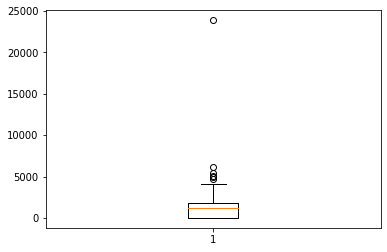

In [26]:
col_info_num (df_1, 'totalSumm')

36 заказов с нулевыми значениями (удалим их, так как они влияют на общие показатели). Также удалим один крупный заказ на 23879 рублей

In [27]:
df_1

,id,orderType,createdAt,totalSumm,Date,just_date
0,1068925,eshop-individual,2023-11-23 14:54:43,0,2023-11-23 14:54:43,2023-11-23
1,1068924,eshop-individual,2023-11-23 14:50:53,0,2023-11-23 14:50:53,2023-11-23
2,1068923,eshop-individual,2023-11-23 14:43:03,0,2023-11-23 14:43:03,2023-11-23
3,1068921,eshop-individual,2023-11-23 14:22:00,0,2023-11-23 14:22:00,2023-11-23
4,1068913,eshop-individual,2023-11-23 11:36:50,0,2023-11-23 11:36:50,2023-11-23
...,...,...,...,...,...,...
15,1068519,eshop-individual,2023-11-08 16:00:27,1027,2023-11-08 16:00:27,2023-11-08
16,1068507,eshop-individual,2023-11-08 12:17:30,819,2023-11-08 12:17:30,2023-11-08
17,1068498,eshop-individual,2023-11-07 22:24:48,4099,2023-11-07 22:24:48,2023-11-07
18,1068486,eshop-individual,2023-11-07 14:31:10,0,2023-11-07 14:31:10,2023-11-07


In [28]:
df_1 = df_1.query('totalSumm > 0 and (totalSumm < 23879)')

In [29]:
df_1

,id,orderType,createdAt,totalSumm,Date,just_date
6,1068907,eshop-individual,2023-11-23 08:57:08,1518,2023-11-23 08:57:08,2023-11-23
7,1068906,eshop-individual,2023-11-23 05:57:48,870,2023-11-23 05:57:48,2023-11-23
8,1068905,eshop-individual,2023-11-23 00:09:24,1501,2023-11-23 00:09:24,2023-11-23
9,1068904,eshop-individual,2023-11-22 23:57:27,1888,2023-11-22 23:57:27,2023-11-22
13,1068894,eshop-individual,2023-11-22 13:41:24,1440,2023-11-22 13:41:24,2023-11-22
...,...,...,...,...,...,...
14,1068529,eshop-individual,2023-11-08 20:20:51,1305,2023-11-08 20:20:51,2023-11-08
15,1068519,eshop-individual,2023-11-08 16:00:27,1027,2023-11-08 16:00:27,2023-11-08
16,1068507,eshop-individual,2023-11-08 12:17:30,819,2023-11-08 12:17:30,2023-11-08
17,1068498,eshop-individual,2023-11-07 22:24:48,4099,2023-11-07 22:24:48,2023-11-07


Тип данных totalSumm


dtype('int64')

Уникальные значения и количество их упоминаний в столбце totalSumm


749     3
1198    3
1322    2
3594    2
819     2
       ..
760     1
1256    1
468     1
1029    1
4099    1
Name: totalSumm, Length: 92, dtype: int64

Максимальные значения столбца totalSumm


,id,orderType,createdAt,totalSumm,Date,just_date
17,1068680,eshop-individual,2023-11-14 18:00:12,6176,2023-11-14 18:00:12,2023-11-14
8,1068561,eshop-individual,2023-11-09 17:24:23,5400,2023-11-09 17:24:23,2023-11-09
12,1068845,eshop-individual,2023-11-20 17:51:46,5083,2023-11-20 17:51:46,2023-11-20
0,1068669,eshop-individual,2023-11-14 14:09:13,4984,2023-11-14 14:09:13,2023-11-14
7,1068850,eshop-individual,2023-11-21 00:43:15,4719,2023-11-21 00:43:15,2023-11-21
11,1068620,eshop-individual,2023-11-12 12:03:11,4148,2023-11-12 12:03:11,2023-11-12
12,1068685,eshop-individual,2023-11-15 02:44:41,4116,2023-11-15 02:44:41,2023-11-15
17,1068498,eshop-individual,2023-11-07 22:24:48,4099,2023-11-07 22:24:48,2023-11-07
6,1068640,eshop-individual,2023-11-13 17:23:18,3879,2023-11-13 17:23:18,2023-11-13
4,1068861,eshop-individual,2023-11-21 12:50:27,3785,2023-11-21 12:50:27,2023-11-21


Cлучайные 10 строк


,id,orderType,createdAt,totalSumm,Date,just_date
16,1068507,eshop-individual,2023-11-08 12:17:30,819,2023-11-08 12:17:30,2023-11-08
4,1068720,eshop-individual,2023-11-16 07:36:05,3033,2023-11-16 07:36:05,2023-11-16
17,1068680,eshop-individual,2023-11-14 18:00:12,6176,2023-11-14 18:00:12,2023-11-14
6,1068640,eshop-individual,2023-11-13 17:23:18,3879,2023-11-13 17:23:18,2023-11-13
18,1068602,eshop-individual,2023-11-12 00:40:21,1743,2023-11-12 00:40:21,2023-11-12
3,1068648,eshop-individual,2023-11-14 09:20:25,3594,2023-11-14 09:20:25,2023-11-14
17,1068884,eshop-individual,2023-11-21 21:05:02,1072,2023-11-21 21:05:02,2023-11-21
4,1068595,eshop-individual,2023-11-11 10:43:21,946,2023-11-11 10:43:21,2023-11-11
17,1068498,eshop-individual,2023-11-07 22:24:48,4099,2023-11-07 22:24:48,2023-11-07
18,1068883,eshop-individual,2023-11-21 20:42:21,842,2023-11-21 20:42:21,2023-11-21


Минимальные значения столбца totalSumm


,id,orderType,createdAt,totalSumm,Date,just_date
5,1068594,eshop-individual,2023-11-11 08:22:02,461,2023-11-11 08:22:02,2023-11-11
12,1068801,eshop-individual,2023-11-18 17:16:23,468,2023-11-18 17:16:23,2023-11-18
3,1068862,eshop-individual,2023-11-21 13:06:07,470,2023-11-21 13:06:07,2023-11-21
10,1068699,eshop-individual,2023-11-15 13:43:42,505,2023-11-15 13:43:42,2023-11-15
1,1068599,eshop-individual,2023-11-11 17:10:12,569,2023-11-11 17:10:12,2023-11-11
7,1068808,eshop-individual,2023-11-19 21:53:31,619,2023-11-19 21:53:31,2023-11-19
19,1068732,eshop-individual,2023-11-15 08:09:12,735,2023-11-15 08:09:12,2023-11-15
4,1068647,eshop-individual,2023-11-14 07:36:10,735,2023-11-14 07:36:10,2023-11-14
5,1068763,eshop-individual,2023-11-17 10:15:26,749,2023-11-17 10:15:26,2023-11-17
10,1068751,eshop-individual,2023-11-16 16:33:34,749,2023-11-16 16:33:34,2023-11-16


Отрицательные значения столбца totalSumm


0

Отсутствующие значения totalSumm


0

Доли отсутствующих значений с округлением totalSumm


0.0

Сводная информация по параметрам данных totalSumm


count     103.00
mean     1814.38
std      1161.53
min       461.00
25%      1091.50
50%      1440.00
75%      2209.00
max      6176.00
Name: totalSumm, dtype: float64

График распределения данных totalSumm


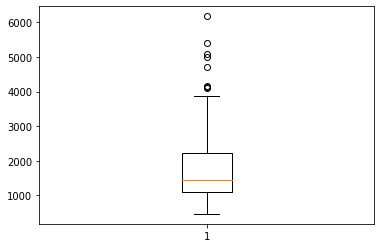

In [30]:
col_info_num (df_1, 'totalSumm')

Средняя Общая сумма с учетом скидки (в валюте объекта) - 1814 рублей, медианная - 1440, то есть крупные заказы  имеют сильное вляние на средние показазтели

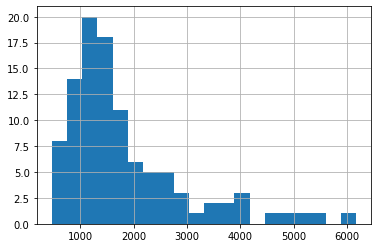

In [31]:
# Построим график распределения сумм заказов
df_1['totalSumm'].hist(bins = 20);

Самые популярные заказы от 1000 до 1500 рублей

In [32]:
# подсчитаем суммы продаж по датам в актуальном периоде
just_date_pivot = df_1.pivot_table(index= ['just_date'], values= 'totalSumm', aggfunc= ['sum'])#.T
# посмотрим результат
just_date_pivot

,sum
,totalSumm
just_date,
2023-11-07,5481
2023-11-08,7560
2023-11-09,9049
2023-11-10,2417
2023-11-11,6837
2023-11-12,15910
2023-11-13,15523
2023-11-14,25792


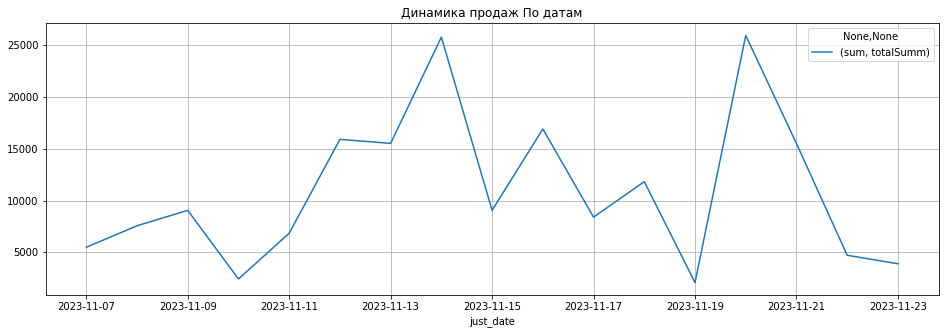

In [33]:
just_date_pivot.plot(figsize=(16, 5),
                       grid=True,
                       title='Динамика продаж По датам');

Ниже черновые коды

In [34]:
# удалим столбцы со списками в значениях ('company', 'source', 'Links')
df_1 = df.drop(['items', 'payments', 'customer', 'contact', 'contragent', 'delivery' ], axis=1)

In [35]:
 item['data']:
        print (data_item['name'], data_item['value'])

SyntaxError: invalid syntax (Temp/ipykernel_2028/2057416573.py, line 1)

In [ ]:
df_1['day'] = pd.to_datetime(df_1['createdAt'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame.from_dict(list(data.items()))

In [ ]:
df

In [ ]:
df.info()

In [ ]:
print(pd.DataFrame(data))

In [ ]:
df = pd.DataFrame.from_dict(list(data.columns()))

In [ ]:
data

In [ ]:
def get_value(obj, key):
    if isinstance(obj, dict):  # Проверка, является ли объект словарем
        if key in obj:  # Проверяем, существует ли ключ в словаре
            return obj[key]
        for sub_obj in obj.values():
            found = get_value(sub_obj, key)  # Рекурсивно вызываем функцию для подобъекта
            if found:
                return found
    elif isinstance(obj, list):  # Проверка, является ли объект списком
        for sub_obj in obj:
            found = get_value(sub_obj, key)  # Рекурсивно вызываем функцию для подобъекта
            if found:
                return found
    return None

In [ ]:
email = get_value(data, 'items')


In [ ]:
email = get_value(data, 'items')

In [ ]:
email

In [ ]:
df = pd.DataFrame(data["orders"])

In [ ]:
df

In [ ]:
df_1 = df[['id', 'orderType', 'orderMethod', 'privilegeType', 'createdAt', 'statusUpdatedAt', 'items', 'summ', 'totalSumm', 'shipmentStore']]

In [ ]:
df_1

In [ ]:
df_1.info()

In [ ]:
df['items']

In [ ]:
print(df_1['items'].to_list())

In [ ]:
display(df_1['items'].dtypes)


In [ ]:
display(df_1['items'].value_counts())


In [ ]:
# создадим фукцию для вывода инфрмации по столбцу таблицы для не числовых данных (должно быть не менее 10 строк)
def col_info_not_num(df_x, name):
# выведем тип данных столбца
    print('Тип данных', name)
    display(df_x[name].dtypes)
# анализ столбца методом подсчета уникальных значений и количества их упоминаний
    print('Уникальные значения и количество их упоминаний в столбце', name)
    display(df_x[name].value_counts())
# получение случайных 10 строк
    print('Cлучайные 10 строк')
    display(df_x.sample(10))
# подсчет отсутствующих значений
    print('Отсутствующие значения', name)
    display(df_x[name].isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x[name].isna().sum() * 100 / len(df_x[name]), 2))

In [ ]:
col_info_not_num (data, ["items"])

In [ ]:
df = pd.DataFrame(data["items"])

In [ ]:
df.info()

In [ ]:
dict = json.loads(data)
print(dict)

In [ ]:
with open("data.json") as f:
    data = json.load(f)
 
print(data)

In [ ]:
with open(data, 'r', encoding='utf-8') as fh: #открываем файл на чтение
    data = json.load(fh) #загружаем из файла данные в словарь data

In [ ]:
res.text

In [ ]:
URL_GET = 'https://app-riche-skin.ru'
res = requests.get(url=URL_GET)
res

In [ ]:
URL_GET = 'https://google.com'
res = requests.get(url=URL_GET)
res

In [ ]:
URL_GET = 'https://riche.skin'

In [ ]:
res = requests.get(url=URL_GET)
res

In [ ]:
URL_GET = 'https://app-riche-skin'

In [ ]:
res = requests.get(url=URL_GET)
res

In [ ]:
for page in range(1, total_pages + 1):
    url = f"https://example.com/page{page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
html = res.text


In [ ]:
soup = BeautifulSoup(html, 'html.parser')


In [ ]:
for p in range(1, 8):
    response = requests.get(url=URL_GET, headers=headers, params={"page" : p})
    soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
soup

In [ ]:
for page in range(1, total_pages + 1):
    url = f"https://example.com/page{page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
print(soup)


In [ ]:
res.json()

In [ ]:
response = requests.get(url=URL, headers=headers)
print(response.text)

In [ ]:
#print(response.status_code)  # Выводит код состояния HTTP, например, 200
print(response.json())        # Выводит JSON-ответ

In [ ]:
response.encoding

In [ ]:
response.raw

In [ ]:
for p in range(1, 3):
    print(p)


In [ ]:
headers = {"X-API-KEY": "FjqFa87rUgdvxFhrhyPQQiy41kl5AnXq"}
params={"page" : p}

In [ ]:
p

In [ ]:
response.headers

In [ ]:
response = requests.get(url=URL, headers=headers, params=params)
response.text

In [ ]:
data = response

In [ ]:
response_parsed = json.loads(response.text)
print(response_parsed)


In [ ]:
#r = requests.post('https://httpbin.org/post', data)  

In [ ]:
#app-riche-skin/add_site_data/

In [ ]:
data = response.json()

In [ ]:
data.values

In [ ]:
data = json.loads(data)
print(data)

In [ ]:
response.encoding

In [ ]:
s1 = json.dumps(data)
#d2 = json.loads(s1)

In [ ]:
s1

In [ ]:
data = json.loads(d2)


In [ ]:
data

In [ ]:
b = data.decode('utf8')

In [ ]:
r = requests.post('https://app-riche-skin/add_site_data', data = data)